In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_advertising = pd.read_csv("table_1.csv", delimiter=";")

df_applications = pd.read_csv("table_2.csv", delimiter=",")
df_sales_revenue = pd.read_csv("table_3.csv", delimiter=",")

In [3]:
##Информация о загруженный таблицах
print(df_advertising.info())
print(df_applications.info())
print(df_sales_revenue.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10943 entries, 0 to 10942
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         10943 non-null  object
 1   campaign     10943 non-null  int64 
 2   keyword      10943 non-null  object
 3   impressions  10943 non-null  int64 
 4   clicks       10943 non-null  int64 
 5   cost         10943 non-null  object
dtypes: int64(3), object(3)
memory usage: 513.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   campaign  156 non-null    object
 1   keyword   138 non-null    object
 2   date      156 non-null    object
 3   leads     156 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column    Non

In [4]:
##Считаем кол-во строк в наших таблицах

num_rows_advertising = df_advertising.shape[0]
num_rows_applications = df_applications.shape[0]
num_rows_sales_revenue = df_sales_revenue.shape[0]

results = pd.DataFrame({
    "Таблица": ["advertising", "applications", "sales_revenue"],
    "Кол-во строк": [num_rows_advertising, num_rows_applications, num_rows_sales_revenue]
})


print(results)

         Таблица  Кол-во строк
0    advertising         10943
1   applications           156
2  sales_revenue            17


In [5]:
#Изменяем тип значений, для того чтобы их правильно сгрупировать
df_advertising["campaign"] = df_advertising["campaign"].astype("object")
df_sales_revenue["campaign"] = df_sales_revenue["campaign"].astype("object")
df_advertising["date"] = pd.to_datetime(df_advertising["date"], format='%d.%m.%Y')
df_applications["date"] = pd.to_datetime(df_applications["date"], format='%Y-%m-%d')
df_sales_revenue["date"] = pd.to_datetime(df_sales_revenue["date"], format='%Y-%m-%d')

In [8]:
# Джойним таблицы чтобы получить результат

combined = pd.merge(df_advertising, df_applications.fillna(''), on=["date", "campaign", "keyword"], how='left')
full_table = pd.merge(combined, df_sales_revenue.fillna(''), on=["date", "campaign", "keyword"], how='left')

In [9]:
#Изменяем тип значений для расчёта показателей
full_table["cost"] = full_table["cost"].str.replace(',', '.')

full_table["cost"] = full_table["cost"].astype("float")
full_table["clicks"] = full_table["clicks"].astype("float")
full_table["impressions"] = full_table["impressions"].astype("float")

In [10]:
print(full_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10943 entries, 0 to 10942
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10943 non-null  datetime64[ns]
 1   campaign     10943 non-null  object        
 2   keyword      10943 non-null  object        
 3   impressions  10943 non-null  float64       
 4   clicks       10943 non-null  float64       
 5   cost         10943 non-null  float64       
 6   leads        0 non-null      float64       
 7   sales        2 non-null      float64       
 8   revenue      2 non-null      float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 769.6+ KB
None


In [11]:
metrics = full_table.copy()
metrics["ARPPU"] = metrics["revenue"] / metrics["sales"]
metrics["CTR"] = metrics["clicks"] / metrics["impressions"]
metrics["CR0"] = metrics["leads"] / metrics["clicks"]
metrics["CR1"] = metrics["sales"] / metrics["leads"]
metrics["CPC"] = metrics["cost"] / metrics["clicks"]
metrics["CPL"] = metrics["cost"] / metrics["leads"]
metrics["CAC"] = metrics["cost"] / metrics["sales"]
metrics["ROMI"] = (metrics["revenue"] - metrics["cost"]) / metrics["cost"]

metrics["CPA"] = metrics["cost"] / metrics["sales"]
metrics["ROI"] = (metrics["revenue"] - metrics["cost"]) / metrics["cost"]


### Таблица со сквозной аналитикой

In [12]:
# С групировкой по айди рекламных компаний
metrics_table_capaign = metrics.groupby(["campaign"]).agg({
    "impressions": "sum",
    "clicks": "sum",
    "cost": "sum",
    "ARPPU": "sum",
    "CTR": "mean",
    "CPC": "mean",
    "CR0": "mean",
    "CR1": "mean",
    "CPL": "sum",
    "CAC": "sum",
    "ROMI": "mean",
    "CPA": "sum",
    "ROI": "mean"
}).reset_index()


In [15]:
# С групировкой по айди рекламных компаний
metrics_table_date = metrics.groupby(["date"]).agg({
    "impressions": "sum",
    "clicks": "sum",
    "cost": "sum",
    "ARPPU": "sum",
    "CTR": "mean",
    "CPC": "mean",
    "CR0": "mean",
    "CR1": "mean",
    "CPL": "sum",
    "CAC": "sum",
    "ROMI": "mean",
    "CPA": "sum",
    "ROI": "mean"
}).reset_index()

In [16]:
metrics_table_date.head()

,date,impressions,clicks,cost,ARPPU,CTR,CPC,CR0,CR1,CPL,CAC,ROMI,CPA,ROI
0,2023-10-01,649.0,58.0,5606.18,0.0,NaN,96.790224,NaN,NaN,0.0,0.0,NaN,0.0,NaN
1,2023-10-02,930.0,75.0,9662.77,0.0,0.083925,127.663005,NaN,NaN,0.0,0.0,NaN,0.0,NaN
2,2023-10-03,1150.0,100.0,9705.63,43100.0,0.082896,95.638596,NaN,NaN,0.0,0.0,inf,0.0,inf
3,2023-10-04,728.0,54.0,4873.47,0.0,NaN,91.447800,NaN,NaN,0.0,0.0,NaN,0.0,NaN
4,2023-10-05,651.0,61.0,6406.67,0.0,0.083501,104.916053,NaN,NaN,0.0,0.0,NaN,0.0,NaN


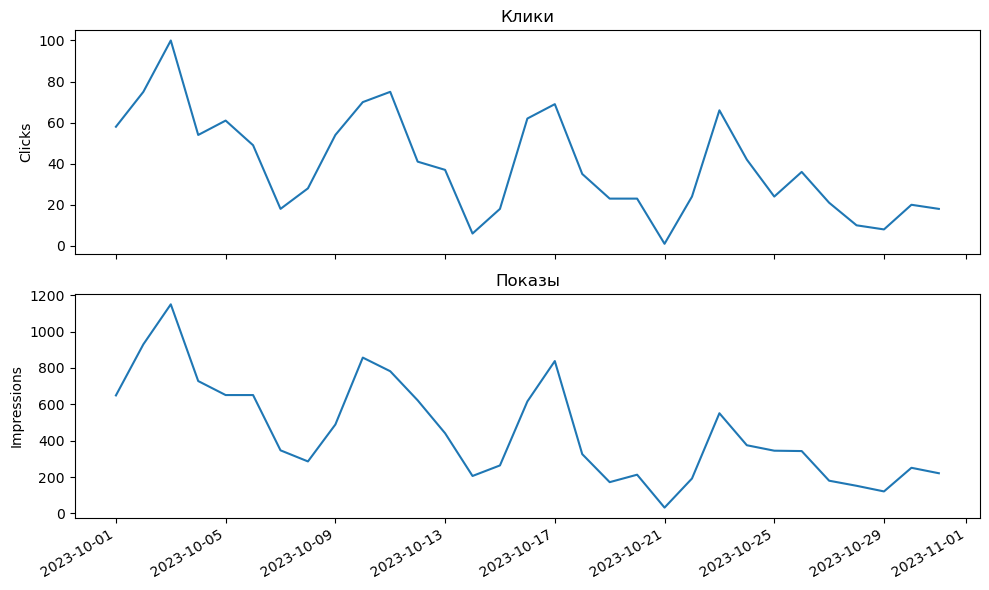

In [19]:
date_list = pd.to_datetime(metrics_table_date["date"])

# Create lists of clicks and impressions
clicks_list = metrics_table_date["clicks"].tolist()
impressions_list = metrics_table_date["impressions"].tolist()

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plot clicks on the first subplot
ax1.plot(mdates.date2num(date_list), clicks_list)
ax1.set_title("Клики")
ax1.set_ylabel("Clicks")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.figure.autofmt_xdate()

# Plot impressions on the second subplot
ax2.plot(date_list, impressions_list)
ax2.set_title("Показы")
ax2.set_ylabel("Impressions")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.figure.autofmt_xdate()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


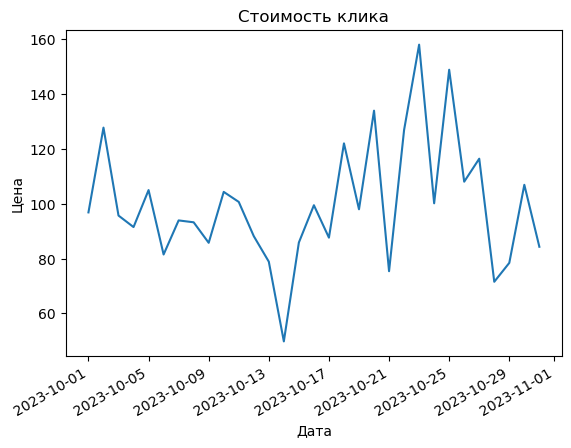

In [20]:
impressions_list = metrics_table_date["CPC"].tolist()
plt.plot(date_list, impressions_list)
plt.title("Стоимость клика")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.show()

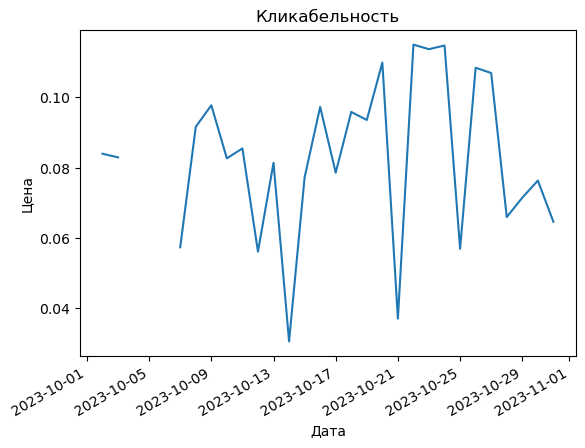

In [21]:
ctr_list = metrics_table_date["CTR"].tolist()
plt.plot(date_list, ctr_list)
plt.title("Кликабельность")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.show()

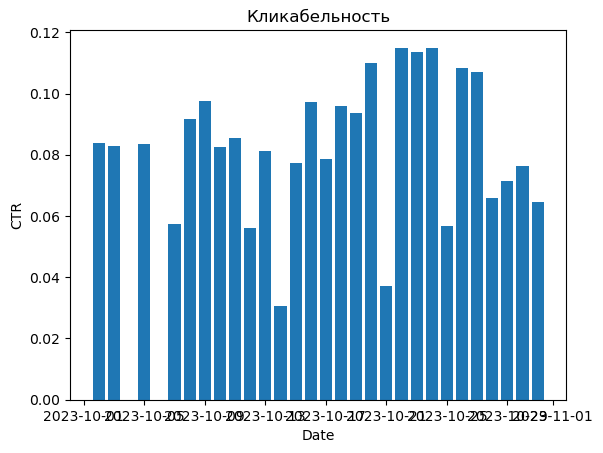

In [22]:
# Create a list of CTR values for each date
ctr_list = metrics_table_date["CTR"].tolist()

# Create a list of dates
date_list = metrics_table_date["date"].tolist()

# Create a bar chart
plt.bar(date_list, ctr_list)

# Add labels and axes
plt.title("Кликабельность")
plt.xlabel("Date")
plt.ylabel("CTR")

# Show the chart
plt.show()

